<a href="https://colab.research.google.com/github/ancestor9/anomaly-detection-basic/blob/main/anomaly_pycaret_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret[full] --quiet
path = '/content/drive/MyDrive/연구개발과제/'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 99.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_noise=pd.read_excel(path + 'Noise.xlsx')
df_temp=pd.read_excel(path + 'Temperature.xlsx')
df_vib=pd.read_excel(path + 'Vibration.xlsx')
df_wall=pd.read_excel(path + 'WallTemp.xlsx')
df_thermo=pd.read_excel(path + 'Thermocouple.xlsx')

df_noise=df_noise.drop('Unnamed: 0',axis=1)
df_temp = df_temp.drop('Unnamed: 0', axis=1)
df_vib = df_vib.drop('Unnamed: 0', axis=1)
df_thermo = df_thermo.drop('Unnamed: 0', axis=1)
df_wall = df_wall.drop('Unnamed: 0', axis=1)

df_noise = df_noise.rename(columns={'DateTime': 'ds', 'Noise': 'Value'})
df_temp = df_temp.rename(columns={'DateTime': 'ds', 'Temperature': 'Value'})
df_vib = df_vib.rename(columns={'DateTime': 'ds', 'Vibration': 'Value'})
df_wall = df_wall.rename(columns={'DateTime': 'ds', 'WallTemp': 'Value'})
df_thermo = df_thermo.rename(columns={'DateTime': 'ds', 'Thermocouple': 'Value'})

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df_noise.shape
df_temp.shape
df_vib.shape
df_wall.shape
df_thermo.shape

(7110, 2)

(5851, 2)

(8298, 2)

(666, 2)

(3812, 2)

In [7]:
# prompt: df_noise.head()
# df_temp.head()
# df_vib.head()  의 value의 unique한 개수
# # df_wall.head()
# df_thermo.head()

print("Unique values in df_noise:", df_noise['Value'].nunique())
print("Unique values in df_temp:", df_temp['Value'].nunique())
print("Unique values in df_vib:", df_vib['Value'].nunique())
print("Unique values in df_thermo:", df_thermo['Value'].nunique())

Unique values in df_noise: 5763
Unique values in df_temp: 2059
Unique values in df_vib: 3792
Unique values in df_thermo: 1952


In [8]:
max1 = df_temp['ds'].max(); min1= df_temp['ds'].min()
max2 = df_noise['ds'].max(); min2= df_noise['ds'].min()
max3 = df_vib['ds'].max(); min3= df_vib['ds'].min()
# max4 = df_wall['ds'].max(); min4= df_wall['ds'].min()
# max5 = df_thermo['ds'].max(); min5= df_thermo['ds'].min()
max1, min1,
max2, min2,
max3, min3

(Timestamp('2024-09-06 02:12:23'), Timestamp('2024-09-04 12:20:47'))

(Timestamp('2024-09-06 04:01:42'), Timestamp('2024-09-04 03:29:17'))

(Timestamp('2024-09-06 02:45:38'), Timestamp('2024-09-04 04:33:00'))

In [9]:
df_temp[:1952]['Value'].nunique()
df_noise[:1952]['Value'].nunique()
df_vib[:1952]['Value'].nunique()

993

1386

1461

In [10]:
df_temp[:1952]['Value']

0       0.238824
1       0.237017
2       0.238660
3       0.237838
4       0.237674
          ...   
1947    0.497615
1948    2.096210
1949    1.782372
1950    1.780236
1951    1.787137
Name: Value, Length: 1952, dtype: float64

In [11]:
tf1 = pd.merge(df_temp[:1952]['Value'], df_noise[:1952]['Value'], left_index=True, right_index=True)
data = pd.merge(tf1, df_vib[:1952]['Value'], left_index=True, right_index=True)
data.rename(columns={'Value_x': 'Temperature', 'Value_y': 'Noise', 'Value': 'Vibration'}, inplace=True)
data

Temperature     Noise  Vibration
0        0.238824  1.618223   3.182502
1        0.237017  1.628740   0.925153
2        0.238660  1.614773   1.653542
3        0.237838  1.617073   4.836141
4        0.237674  1.611158  -5.380988
...           ...       ...        ...
1947     0.497615  1.750660 -23.183874
1948     2.096210  1.238333  12.330014
1949     1.782372  0.983156  -3.957021
1950     1.780236  1.768241  -1.233765
1951     1.787137  1.539846 -18.629798

[1952 rows x 3 columns]

In [12]:
data.columns

Index(['Temperature', 'Noise', 'Vibration'], dtype='object')

In [13]:
# prompt: data 컬럼의 유니크한 개수

# Check for unique values in each column
for col in ['Temperature', 'Noise', 'Vibration']:
  print(f"Unique values in '{col}': {data[col].nunique()}")

Unique values in 'Temperature': 993
Unique values in 'Noise': 1386
Unique values in 'Vibration': 1461


In [14]:
import plotly.express as px

def trend(column):

    #create moving-averages
    data['MA15'] = data[column].rolling(15).mean() # Use column variable here
    data['MA30'] = data[column].rolling(30).mean() # Use column variable here
    data['MA60'] = data[column].rolling(60).mean() # Use column variable here

    # plot
import plotly.express as px

def trend(column):

    #create moving-averages
    data['MA15'] = data[column].rolling(15).mean() # Use column variable here
    data['MA30'] = data[column].rolling(30).mean() # Use column variable here
    data['MA60'] = data[column].rolling(60).mean() # Use column variable here

    # plot

    fig = px.line(data[60:], y=['MA15', 'MA30', 'MA60'],
                title= f'Die Casting Machine: {column}_Trends',
                template = 'plotly_dark')
    fig.show()

for column in ['Temperature', 'Noise', 'Vibration']:
    trend(column)

In [27]:
data.drop(columns=['MA15', 'MA30', 'MA60'], inplace=True)

In [28]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

In [29]:
models()

Name  \
ID                                             
abod            Angle-base Outlier Detection   
cluster       Clustering-Based Local Outlier   
cof         Connectivity-Based Local Outlier   
iforest                     Isolation Forest   
histogram  Histogram-based Outlier Detection   
knn             K-Nearest Neighbors Detector   
lof                     Local Outlier Factor   
svm                   One-class SVM detector   
pca             Principal Component Analysis   
mcd           Minimum Covariance Determinant   
sod               Subspace Outlier Detection   
sos             Stochastic Outlier Selection   

                                                  Reference  
ID                                                           
abod                                  pyod.models.abod.ABOD  
cluster    pycaret.internal.patches.pyod.CBLOFForceToDouble  
cof                                     pyod.models.cof.COF  
iforest                         pyod.models.iforest.IForest  
histogram                             pyod.models.hbos.HBOS  
knn                                     pyod.models.knn.KNN  
lof                                     pyod.models.lof.LOF  
svm                                 pyod.models.ocsvm.OCSVM  
pca                                     pyod.models.pca.PCA  
mcd                                     pyod.models.mcd.MCD  
sod                                     pyod.models.sod.SOD  
sos                                     pyod.models.sos.SOS

In [32]:
iforest = create_model('iforest', fraction = 0.05)
iforest_results = assign_model(iforest)
iforest_results

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Temperature     Noise  Vibration  Anomaly  Anomaly_Score
0        0.238824  1.618223   3.182502        1       0.033962
1        0.237017  1.628740   0.925153        1       0.029706
2        0.238660  1.614773   1.653542        1       0.029201
3        0.237838  1.617073   4.836141        1       0.037200
4        0.237674  1.611158  -5.380988        1       0.050545
...           ...       ...        ...      ...            ...
1947     0.497615  1.750660 -23.183874        1       0.074954
1948     2.096210  1.238333  12.330014        0      -0.139879
1949     1.782372  0.983156  -3.957021        0      -0.104625
1950     1.780236  1.768241  -1.233765        0      -0.184750
1951     1.787137  1.539846 -18.629799        0      -0.164576

[1952 rows x 5 columns]

from matplotlib import pyplot as plt
iforest_results['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Noise'].plot(kind='hist', bins=20, title='Noise')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Vibration'].plot(kind='hist', bins=20, title='Vibration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Anomaly'].plot(kind='hist', bins=20, title='Anomaly')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results.plot(kind='scatter', x='Temperature', y='Noise', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results.plot(kind='scatter', x='Noise', y='Vibration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results.plot(kind='scatter', x='Vibration', y='Anomaly', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results.plot(kind='scatter', x='Anomaly', y='Anomaly_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Temperature'].plot(kind='line', figsize=(8, 4), title='Temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Noise'].plot(kind='line', figsize=(8, 4), title='Noise')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Vibration'].plot(kind='line', figsize=(8, 4), title='Vibration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
iforest_results['Anomaly'].plot(kind='line', figsize=(8, 4), title='Anomaly')
plt.gca().spines[['top', 'right']].set_visible(False)

In [40]:
# prompt: iforest 시각화
# Assuming 'iforest_results' DataFrame is already created and available

fig = px.scatter(iforest_results, x='Vibration', y='Noise', color='Anomaly',
                 title='IForest Anomaly Detection',
                 )

fig.show()

In [42]:
fig = px.scatter(iforest_results, x='Vibration', y='Temperature', color='Anomaly',
                 title='IForest Anomaly Detection',
                 )

fig.show()

In [41]:
fig = px.scatter(iforest_results, x='Temperature', y='Noise', color='Anomaly',
                 title='IForest Anomaly Detection',
                 )

fig.show()

In [48]:
# prompt: px.scatter_3d,  alpha와 구의 크기를 작게,

fig = px.scatter_3d(iforest_results, x='Temperature', y='Noise', z='Vibration', color='Anomaly',
                 title='IForest Anomaly Detection 3D',
                 opacity=0.3, # Adjust alpha value here
                 size_max=0.1) # Adjust marker size here
fig.show()

In [ ]:
fig

In [49]:
# prompt: fig의 원의 크기를 작게 하고 그림크기는 크게하고 그림 저장

fig = px.scatter_3d(iforest_results, x='Temperature', y='Noise', z='Vibration', color='Anomaly',
                 title='IForest Anomaly Detection 3D',
                 opacity=0.3, # Adjust alpha value here
                 size_max=0.1) # Adjust marker size here

fig.update_layout(
    width=1200,  # Adjust width
    height=800,  # Adjust height
    title_font_size=24 # Adjust title font size
)
fig.show()

In [54]:
# prompt: vae 코드를 적용해다오

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pycaret.anomaly import *

# Assuming 'data' DataFrame from your previous code is available

# Data preprocessing: Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dimensionality Reduction (PCA or t-SNE)
# Choose either PCA or t-SNE based on your preference and data characteristics

# PCA
# pca = PCA(n_components=2)  # Reduce to 2 dimensions
# reduced_data = pca.fit_transform(scaled_data)

# t-SNE (for visualization, can be slow for large datasets)
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(scaled_data)

# VAE model
latent_dim = 2  # Dimensionality of the latent space

encoder_inputs = keras.Input(shape=(scaled_data.shape[1],))
x = layers.Dense(64, activation="relu")(encoder_inputs)
x = layers.Dense(32, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation="relu")(latent_inputs)
x = layers.Dense(64, activation="relu")(x)
decoder_outputs = layers.Dense(scaled_data.shape[1], activation="linear")(x) # Use 'linear' for reconstruction
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

vae = keras.Model(encoder_inputs, decoder(encoder(encoder_inputs)[2]), name='vae')
vae.compile(optimizer='adam', loss='mse') # Use MSE loss for reconstruction
vae.fit(scaled_data, scaled_data, epochs=50, batch_size=32, verbose = 1)

# Reconstructions and anomaly scores
reconstructions = vae.predict(scaled_data)
mse = np.mean(np.power(scaled_data - reconstructions, 2), axis=1)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │            320 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 32)             │          2,080 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_mean (Dense)            │ (None, 2)              │             66 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z_log_var (Dense)         │ (None, 2)              │             66 │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ z (Lambda)                │ (None, 2)              │              0 │ z_mean[0][0],          │
│                           │                        │                │ z_log_var[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,532 (9.89 KB)

 Trainable params: 2,532 (9.89 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,468 (9.64 KB)

 Trainable params: 2,468 (9.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0404
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5064
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3435
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2104
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1639
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1412
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1239
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1210
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1065
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1113
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1010
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1001
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1017
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0885
Epoch 16/50
61/61 ━

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [58]:
# Visualization (using reconstructed data)
data['Reconstruction_Error'] = mse

# Use column names for 'x' and 'y'
fig = px.scatter(data, x='Temperature', y='Noise', color='Reconstruction_Error',  # Changed x and y to column names
                 title='VAE Anomaly Detection (Reconstruction Error)')
fig.show()

In [59]:
# Anomalies based on threshold
threshold = np.quantile(mse, 0.95) # adjust for appropriate threshold
data['Anomaly_VAE'] = (mse > threshold).astype(int)

In [61]:
# prompt: vae 이상치를 시각화

# Visualization (using latent space representation)
latent_representation = encoder.predict(scaled_data)[2]
data['z1'] = latent_representation[:, 0]
data['z2'] = latent_representation[:, 1]

fig = px.scatter(data, x='z1', y='z2', color='Anomaly_VAE',
                 title='VAE Anomaly Detection (Latent Space)')
fig.show()

# 3D visualization in latent space
fig = px.scatter_3d(data, x='z1', y='z2', z='Reconstruction_Error', color='Anomaly_VAE',
                    title='VAE Anomaly Detection (Latent Space 3D)',
                    opacity=0.7)

fig.update_layout(
    width=1000,  # Adjust width
    height=800,  # Adjust height
    title_font_size=24 # Adjust title font size
)
fig.show()

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


## **Frukan 코드**

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

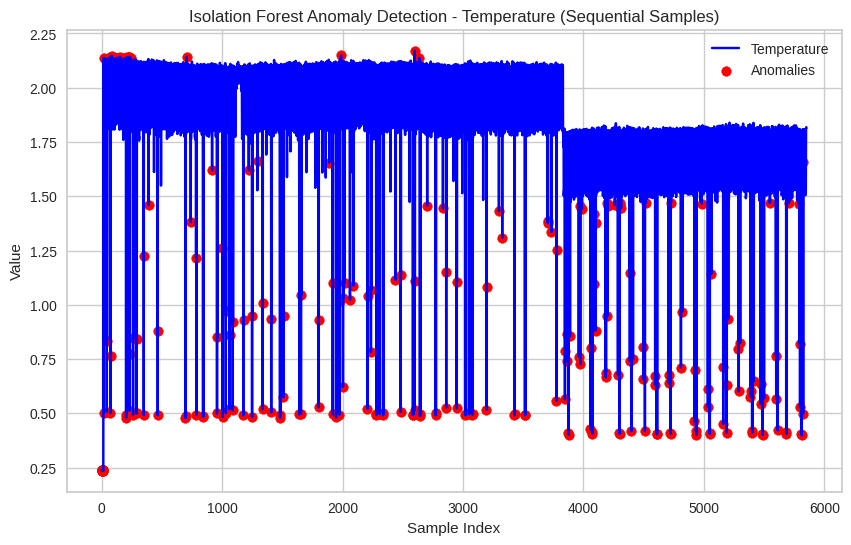

Anomalies Detected in Temperature:
         Value  Anomaly  Anomaly_Score  Sample
0     0.238824        1       0.206077       0
1     0.237017        1       0.206077       1
2     0.238660        1       0.206077       2
3     0.237838        1       0.206077       3
4     0.237674        1       0.206077       4
...        ...      ...            ...     ...
5798  0.528013        1       0.133787    5798
5810  0.402807        1       0.174255    5810
5812  0.398206        1       0.174775    5812
5824  0.499094        1       0.117083    5824
5826  1.658151        1       0.001130    5826

[292 rows x 4 columns]


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

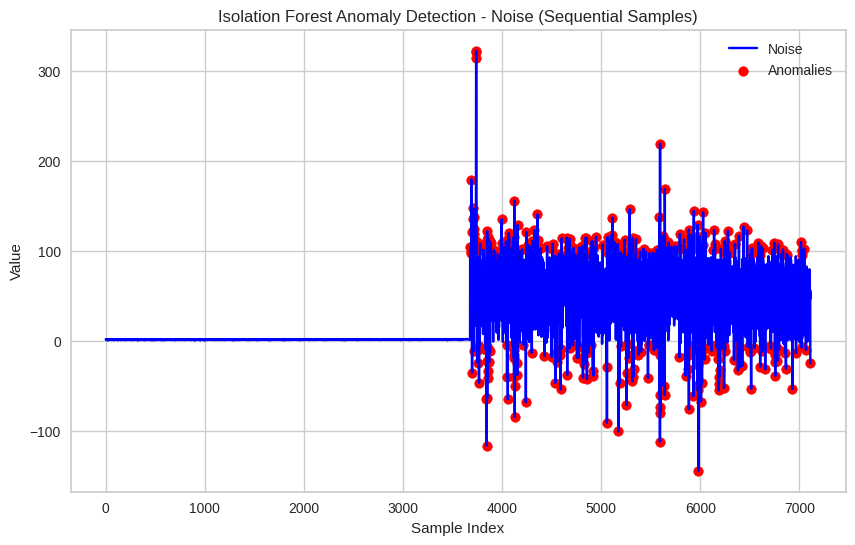

Anomalies Detected in Noise:
           Value  Anomaly  Anomaly_Score  Sample
3677  104.511795        1       0.052392    3677
3683   99.443909        1       0.027025    3683
3688  179.634827        1       0.183730    3688
3689   97.593056        1       0.015354    3689
3696  -35.329231        1       0.151570    3696
...          ...      ...            ...     ...
7026  101.056488        1       0.036159    7026
7029   99.564323        1       0.026975    7029
7049  102.801666        1       0.044163    7049
7065  -10.155956        1       0.071209    7065
7109  -24.719955        1       0.131847    7109

[356 rows x 4 columns]


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

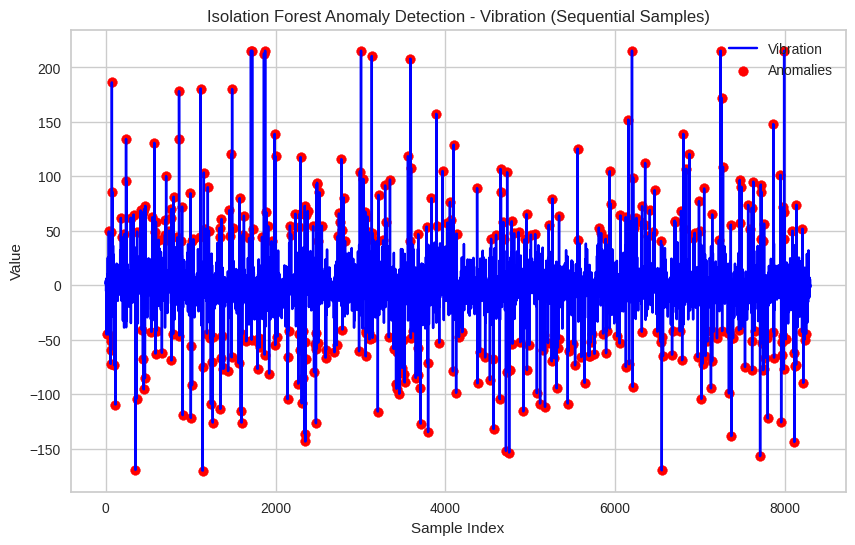

Anomalies Detected in Vibration:
          Value  Anomaly  Anomaly_Score  Sample
11   -45.173397        1       0.026084      11
31   -45.153709        1       0.026084      31
36    49.445030        1       0.037824      36
58   -72.196114        1       0.094720      58
63   -59.583748        1       0.077318      63
...         ...      ...            ...     ...
8200 -42.778236        1       0.009596    8200
8205  51.932053        1       0.043754    8205
8214 -89.559494        1       0.131340    8214
8229 -49.983406        1       0.042349    8229
8248 -44.471252        1       0.023796    8248

[415 rows x 4 columns]


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

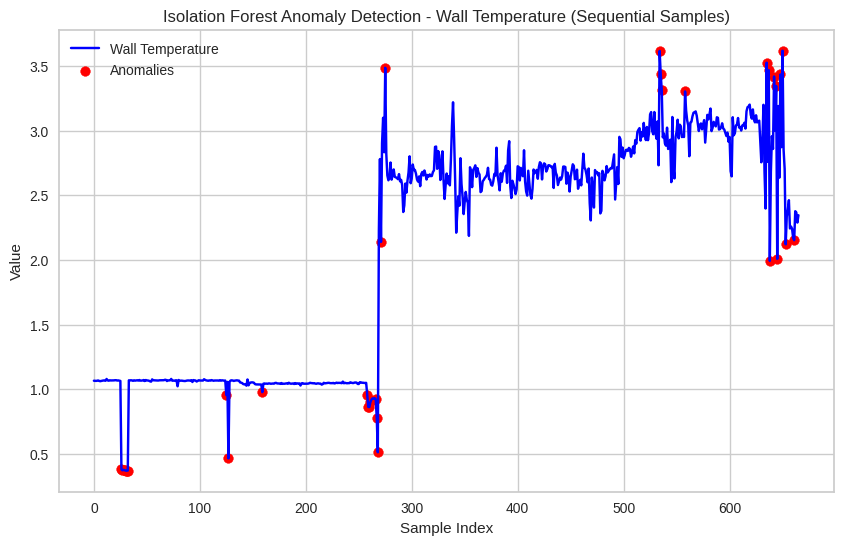

Anomalies Detected in Wall Temperature:
        Value  Anomaly  Anomaly_Score  Sample
26   0.380246        1       0.110472      26
27   0.373350        1       0.094363      27
28   0.377619        1       0.106412      28
29   0.374664        1       0.097857      29
30   0.371052        1       0.100363      30
31   0.370066        1       0.106412      31
32   0.371708        1       0.097357      32
125  0.955219        1       0.003230     125
127  0.465293        1       0.122268     127
159  0.977220        1       0.001590     159
258  0.957189        1       0.000025     258
259  0.863276        1       0.046281     259
260  0.862291        1       0.049080     260
261  0.900710        1       0.026500     261
262  0.920084        1       0.010422     262
266  0.922382        1       0.007407     266
267  0.776258        1       0.079574     267
268  0.512907        1       0.123821     268
271  2.138989        1       0.018198     271
275  3.484978        1       0.063087   

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

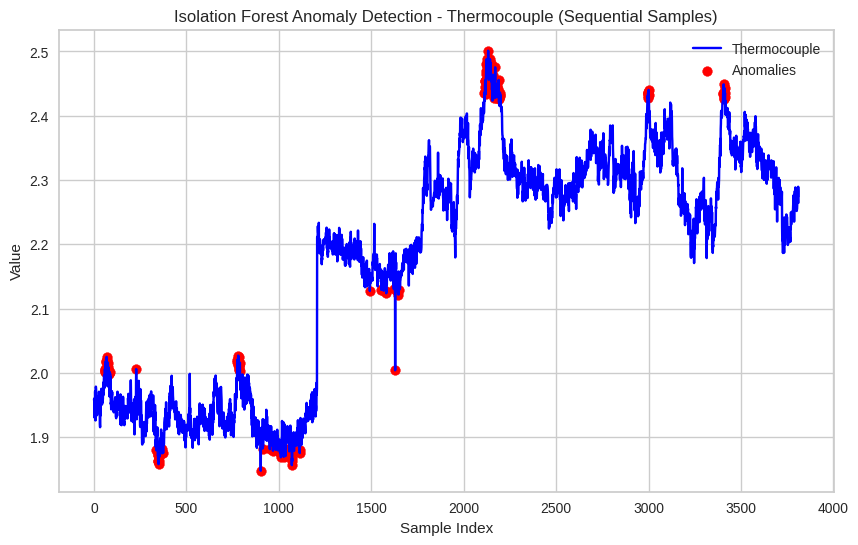

Anomalies Detected in Thermocouple:
         Value  Anomaly  Anomaly_Score  Sample
58    2.002628        1       0.009225      58
59    2.006079        1       0.017660      59
60    2.001806        1       0.005461      60
62    2.004600        1       0.014740      62
63    2.016596        1       0.045353      63
...        ...      ...            ...     ...
3408  2.427582        1       0.001161    3408
3409  2.426432        1       0.002497    3409
3411  2.442865        1       0.019435    3411
3412  2.428897        1       0.004487    3412
3413  2.435470        1       0.004120    3413

[190 rows x 4 columns]


In [ ]:
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
def detect_anomalies(df, value_column, label):
    df = df.rename(columns={value_column: 'Value'})
    df['Sample'] = range(len(df))
    df = df[['Sample', 'Value']]

    exp_ano = setup(data=df[['Value']], session_id=42, normalize=True, verbose=False)
    model = create_model('iforest')
    df_results = assign_model(model)

    df_results['Sample'] = df['Sample']

    plt.figure(figsize=(10, 6))
    plt.plot(df_results['Sample'], df_results['Value'], label=label, color='blue')
    plt.scatter(
        df_results[df_results['Anomaly'] == 1]['Sample'],
        df_results[df_results['Anomaly'] == 1]['Value'],
        color='red', label='Anomalies'
    )
    plt.title(f"Isolation Forest Anomaly Detection - {label} (Sequential Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    print(f"Anomalies Detected in {label}:")
    print(df_results[df_results['Anomaly'] == 1])

detect_anomalies(df_temp, 'Temperature', 'Temperature')
detect_anomalies(df_noise, 'Noise', 'Noise')
detect_anomalies(df_vib, 'Vibration', 'Vibration')
detect_anomalies(df_wall, 'WallTemp', 'Wall Temperature')
detect_anomalies(df_thermo, 'Thermocouple', 'Thermocouple')


In [ ]:
from glob import glob
file_paths = glob(path + '*.xlsx')
file_paths

['/content/drive/MyDrive/연구개발과제/WallTemp.xlsx',
 '/content/drive/MyDrive/연구개발과제/Vibration.xlsx',
 '/content/drive/MyDrive/연구개발과제/Thermocouple.xlsx',
 '/content/drive/MyDrive/연구개발과제/Temperature.xlsx',
 '/content/drive/MyDrive/연구개발과제/Noise.xlsx']

In [ ]:
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def detect_and_normalize_anomalies(df, value_column, label):
    df = df.rename(columns={value_column: 'Value'})
    df['Sample'] = range(len(df))

    scaler = MinMaxScaler()
    df['Normalized_Value'] = scaler.fit_transform(df[['Value']])

    exp_ano = setup(data=df[['Normalized_Value']], session_id=42, normalize=False,verbose=False)

    model = create_model('iforest')
    df_results = assign_model(model)

    df_results['Sample'] = df['Sample']
    df_results['Label'] = label
    return df_results

# file_paths = ['Noise.xlsx', 'Temperature.xlsx', 'Vibration.xlsx', 'WallTemp.xlsx', 'Thermocouple.xlsx']
labels = ['Noise', 'Temperature', 'Vibration', 'Wall Temperature', 'Thermocouple']
value_columns = ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']

df_results_list = []

for file_path, value_column, label in zip(file_paths, value_columns, labels):
    df = pd.read_excel(file_path)
    df_results = detect_and_normalize_anomalies(df, value_column, label)
    df_results_list.append(df_results)

df_combined = pd.concat(df_results_list, ignore_index=True)

plt.figure(figsize=(15, 8))

for label, color, linestyle in zip(
    labels,
    ['red', 'blue', 'green', 'purple', 'orange'],
    ['-', '--', '-.', ':', '-']
):
    subset = df_combined[df_combined['Label'] == label]
    plt.plot(
        subset['Sample'], subset['Normalized_Value'],
        label=f'{label} (Normal)', color=color, linewidth=1.2, alpha=0.8, linestyle=linestyle
    )
    anomalies = subset[subset['Anomaly'] == 1]
    plt.scatter(
        anomalies['Sample'], anomalies['Normalized_Value'],
        color='black', label=f'{label} (Anomalies)', s=30, alpha=0.9
    )

plt.title("Combined Anomaly Detection for All Datasets (Normalized Values)")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Value")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['Value'], dtype='object')] are in the [columns]"

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Processing:   0%|          | 0/3 [00:00<?, ?it/s]


Model Comparison:

     Model  Precision    Recall  F1-Score
0  iforest   0.045843  0.045807  0.045825
1      knn   0.044566  0.043846  0.044203
2      lof   0.052019  0.051777  0.051898
3      svm   0.054306  0.054517  0.054411
4      pca   0.044255  0.044953  0.044601


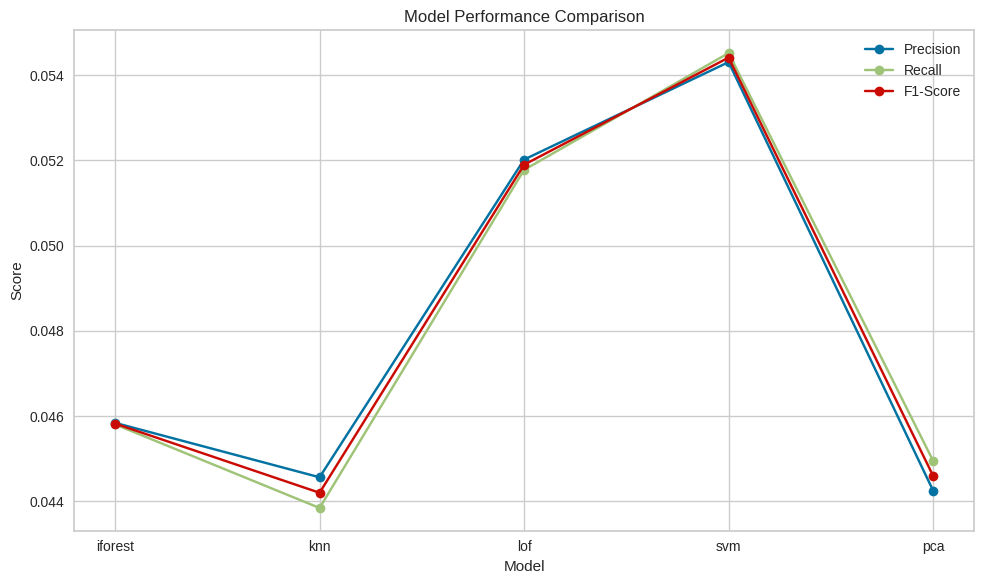


Best Model: svm with F1-Score: 0.054411193159735714


In [ ]:
from pycaret.anomaly import *
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import random

def detect_and_normalize_anomalies(df, value_column, label, model_name):
    df = df.rename(columns={value_column: 'Value'})
    df['Sample'] = range(len(df))

    scaler = MinMaxScaler()
    df['Normalized_Value'] = scaler.fit_transform(df[['Value']])

    exp_ano = setup(data=df[['Normalized_Value']], session_id=42, normalize=False,verbose=False)

    # Use a specific anomaly detection model
    model = create_model(model_name)
    df_results = assign_model(model)

    df_results['Sample'] = df['Sample']
    df_results['Label'] = label
    df_results['Model'] = model_name
    return df_results

file_paths = ['Noise.xlsx', 'Temperature.xlsx', 'Vibration.xlsx', 'WallTemp.xlsx', 'Thermocouple.xlsx']
labels = ['Noise', 'Temperature', 'Vibration', 'Wall Temperature', 'Thermocouple']
value_columns = ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']
models = ['iforest', 'knn', 'lof', 'svm', 'pca']

df_results_list = []

# Process each dataset for each model
for model_name in models:
    for file_path, value_column, label in zip(file_paths, value_columns, labels):
        df = pd.read_excel(file_path)
        df_results = detect_and_normalize_anomalies(df, value_column, label, model_name)
        df_results_list.append(df_results)

df_combined = pd.concat(df_results_list, ignore_index=True)

# Simulate true labels by randomly assigning anomalies (5% of data as anomalies)
np.random.seed(42)
df_combined['True_Label'] = 0  # Start with all normal
anomaly_indices = np.random.choice(df_combined.index, size=int(0.05 * len(df_combined)), replace=False)
df_combined.loc[anomaly_indices, 'True_Label'] = 1



# Evaluation: Comparing models
evaluation_results = []

for model_name in models:
    model_subset = df_combined[df_combined['Model'] == model_name]
    true_labels = model_subset['True_Label'].values  # Simulated true labels
    pred_labels = model_subset['Anomaly'].values  # Predictions from the anomaly detection model

    # Calculating precision, recall, and F1-score based on detected anomalies (1s)
    if len(np.unique(pred_labels)) > 1:  # Only calculate if we have both classes
        precision = precision_score(true_labels, pred_labels, pos_label=1, average='binary', zero_division=0)
        recall = recall_score(true_labels, pred_labels, pos_label=1, average='binary', zero_division=0)
        f1 = f1_score(true_labels, pred_labels, pos_label=1, average='binary', zero_division=0)
    else:
        precision, recall, f1 = 0.0, 0.0, 0.0

    evaluation_results.append({'Model': model_name, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

eval_df = pd.DataFrame(evaluation_results)
print("\nModel Comparison:\n")
print(eval_df)

# Plot model comparison
plt.figure(figsize=(10, 6))
for metric in ['Precision', 'Recall', 'F1-Score']:
    plt.plot(eval_df['Model'], eval_df[metric], marker='o', label=metric)

plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Displaying the best model based on F1-Score
best_model = eval_df.loc[eval_df['F1-Score'].idxmax()]
print(f"\nBest Model: {best_model['Model']} with F1-Score: {best_model['F1-Score']}")


In [ ]:
import pandas as pd

df_noise = pd.read_excel('Noise.xlsx')
df_temp = pd.read_excel('Temperature.xlsx')
df_vib = pd.read_excel('Vibration.xlsx')
df_wall = pd.read_excel('WallTemp.xlsx')
df_thermo = pd.read_excel('Thermocouple.xlsx')


def prepare_combined_df_sequential(df_list, columns):
    max_len = max([len(df) for df in df_list])
    combined_df = pd.DataFrame()


    for df, column in zip(df_list, columns):
        df = df.rename(columns={'Value': column})
        df = df.reset_index(drop=True)
        combined_df[column] = df[column]


    combined_df['Sample'] = range(1, len(combined_df) + 1)


    combined_df = combined_df[['Sample'] + [col for col in columns]]
    return combined_df


combined_df = prepare_combined_df_sequential(
    [df_noise, df_temp, df_vib, df_wall, df_thermo],
    ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']
)


print(combined_df.head())



   Sample     Noise  Temperature  Vibration  WallTemp  Thermocouple
0       1  1.618223     0.238824   3.182502  1.065879      1.957766
1       2  1.628740     0.237017   0.925153  1.065222      1.960067
2       3  1.614773     0.238660   1.653542  1.064566      1.959738
3       4  1.617073     0.237838   4.836141  1.065551      1.930488
4       5  1.611158     0.237674  -5.380988  1.067849      1.947742


In [ ]:
from pycaret.anomaly import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Step 1: Normalize and combine the data
value_columns = ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']

# Normalize the data
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(combined_df[value_columns])
normalized_df = pd.DataFrame(normalized_values, columns=value_columns)
normalized_df['Sample'] = combined_df['Sample']  # Add Sample column

# Step 2: Setup PyCaret anomaly detection
exp_ano = setup(data=normalized_df[value_columns], session_id=42,verbose=False)
iforest = create_model('iforest')

# Step 3: Assign anomaly labels
iforest_results = assign_model(iforest)

# Step 4: Combine anomaly results with Sample index for plotting
iforest_results['Sample'] = normalized_df['Sample']

# Step 5: Create plot for each column (Noise, Temperature, etc.)
for column in value_columns:
    fig = px.line(iforest_results, x="Sample", y=column, title=f'Anomaly Detection: {column}', template='plotly_dark')

    # Identify anomalies
    outlier_samples = iforest_results[iforest_results['Anomaly'] == 1]['Sample']
    anomaly_values = iforest_results.loc[iforest_results['Anomaly'] == 1, column]

    # Add anomaly markers
    fig.add_trace(go.Scatter(x=outlier_samples, y=anomaly_values, mode='markers',
                              name='Anomaly', marker=dict(color='red', size=10)))

    # Show the plot
    fig.show()


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Step 1: Normalize and combine the data
value_columns = ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']

# Normalize the data
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(combined_df[value_columns])
normalized_df = pd.DataFrame(normalized_values, columns=value_columns)
normalized_df['Sample'] = combined_df['Sample']  # Add Sample column

# Step 2: Setup PyCaret anomaly detection
exp_ano = setup(data=normalized_df[value_columns], session_id=42, verbose=False)
iforest = create_model('iforest')

# Step 3: Assign anomaly labels
iforest_results = assign_model(iforest)

# Step 4: Combine anomaly results with Sample index
iforest_results['Sample'] = normalized_df['Sample']

# Step 5: Create a single combined plot
fig = px.line(title='Combined Anomaly Detection', template='plotly_dark')

# Add lines for each column
for column in value_columns:
    fig.add_trace(go.Scatter(
        x=iforest_results['Sample'],
        y=iforest_results[column],
        mode='lines',
        name=column
    ))

# Add anomaly markers
anomaly_samples = iforest_results[iforest_results['Anomaly'] == 1]['Sample']
for column in value_columns:
    anomaly_values = iforest_results.loc[iforest_results['Anomaly'] == 1, column]
    fig.add_trace(go.Scatter(
        x=anomaly_samples,
        y=anomaly_values,
        mode='markers',
        name=f'{column} Anomaly',
        marker=dict(color='red', size=10)
    ))

# Show the plot
fig.update_layout(
    xaxis_title='Sample',
    yaxis_title='Normalized Values',
    legend_title='Legend'
)
fig.show()


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# 그대로 데이터 ( no normalize )

In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=combined_df[['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']], session_id=42)

iforest = create_model('iforest')
#plot_model(iforest) #3d model
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

# MIN MAX SCALED

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()

value_columns = ['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']
normalized_values = scaler.fit_transform(combined_df[value_columns])

normalized_df = pd.DataFrame(normalized_values, columns=value_columns)
normalized_df['Sample'] = combined_df['Sample']


normalized_df = normalized_df[['Sample'] + value_columns]

print(normalized_df.head())


   Sample     Noise  Temperature  Vibration  WallTemp  Thermocouple
0       1  0.312632     0.001529   0.449748  0.214300      0.168258
1       2  0.312654     0.000595   0.443895  0.214097      0.171780
2       3  0.312624     0.001444   0.445783  0.213895      0.171276
3       4  0.312629     0.001019   0.454037  0.214199      0.126509
4       5  0.312617     0.000935   0.427541  0.214906      0.152916


In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=normalized_df[['Noise', 'Temperature', 'Vibration', 'WallTemp', 'Thermocouple']], session_id=42)
iforest = create_model('iforest')

#plot_model(iforest)
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

selected_columns = ['Noise', 'Temperature', 'Vibration']
scaler = MinMaxScaler()
normalized_selected_values = scaler.fit_transform(combined_df[selected_columns])
normalized_selected_df = pd.DataFrame(normalized_selected_values, columns=selected_columns)
normalized_selected_df['Sample'] = combined_df['Sample']  # Sample sütununu ekle

# Step 2: PyCaret setup
exp_ano = setup(data=normalized_selected_df[selected_columns], session_id=42, verbose=False)
iforest = create_model('iforest')

# Step 3: Assign anomaly labels
iforest_results = assign_model(iforest)
iforest_results['Sample'] = normalized_selected_df['Sample']

for column in selected_columns:
    fig = px.line(iforest_results, x="Sample", y=column, title=f'Anomaly Detection: {column}', template='plotly_dark')


    outlier_samples = iforest_results[iforest_results['Anomaly'] == 1]['Sample']
    anomaly_values = iforest_results.loc[iforest_results['Anomaly'] == 1, column]

    # Anomaly points
    fig.add_trace(go.Scatter(
        x=outlier_samples,
        y=anomaly_values,
        mode='markers',
        name=f'{column} Anomaly',
        marker=dict(color='red', size=10)
    ))

    fig.show()


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=normalized_df[['Noise', 'Temperature', 'Vibration']], session_id=42)

iforest = create_model('iforest')

#plot_model(iforest)
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=normalized_df[['Temperature', 'Vibration']], session_id=42)

iforest = create_model('iforest')
#plot_model(iforest) #3d
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=normalized_df[['Noise', 'Vibration']], session_id=42)
iforest = create_model('iforest')
#plot_model(iforest)
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from pycaret.anomaly import *

# PyCaret Anomaly Detection Setup
exp_ano = setup(data=normalized_df[['Noise', 'Temperature']], session_id=42)
iforest = create_model('iforest')

#plot_model(iforest)
plot_model(iforest, plot="umap")


Processing:   0%|          | 0/3 [00:00<?, ?it/s]